In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
#Load the arrest data
nypd = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')

In [3]:
#Look at the five rows
nypd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,206892169,12/31/2019,907.0,"IMPAIRED DRIVING,DRUG",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U4,M,M,33,0,25-44,M,WHITE,1000916,245710,40.841085,-73.939769
1,206888084,12/31/2019,739.0,"FRAUD,UNCLASSIFIED-FELONY",112.0,THEFT-FRAUD,PL 1908301,F,Q,101,0,25-44,M,BLACK HISPANIC,1055868,156522,40.596012,-73.742116
2,206890433,12/31/2019,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",102.0,HOMICIDE-NEGLIGENT-VEHICLE,PL 1251201,F,M,23,0,18-24,M,BLACK,997462,227024,40.789803,-73.952289
3,206890441,12/31/2019,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,S,120,0,18-24,M,BLACK,962822,174282,40.645023,-74.077217
4,206890973,12/31/2019,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,25,97,25-44,M,BLACK,1004138,226326,40.787875,-73.928182


In [4]:
#The Data Dictionary for the Columns
data_dictionary = """
ARREST_KEY: Randomly generated persistent ID for each arrest

ARREST_DATE: Exact date of arrest for the reported event

PD_CD: Three digit internal classification code (more granular than
Key Code)

PD_DESC: Description of internal classification corresponding with PD
code (more granular than Offense Description)

KY_CD: Three digit internal classification code (more general
category than PD code)

OFNS_DESC: Description of internal classification corresponding with KY
code (more general category than PD description)

LAW_CODE: Law code charges corresponding to the NYS Penal Law,
VTL and other various local laws

LAW_CAT_CD: Level of offense: felony, misdemeanor, violation

ARREST_BORO: Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn),
M(Manhattan), Q(Queens)

ARREST_PRECINCT: Precinct where the arrest occurred

JURISDICTION_CODE: Jurisdiction responsible for arrest. Jurisdiction codes
0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst
codes 3 and more represent non NYPD jurisdictions

AGE_GROUP: Perpetrator’s age within a category

PERP_SEX: Perpetrator’s sex description

PERP_RACE: Perpetrator’s race description

X_COORD_CD: Midblock X-coordinate for New York State Plane
Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

Y_COORD_CD: Midblock Y-coordinate for New York State Plane
Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

Latitude: Latitude coordinate for Global Coordinate System, WGS
1984, decimal degrees (EPSG 4326)

Longitude: Longitude coordinate for Global Coordinate System, WGS
1984, decimal degrees (EPSG 4326)

"""


In [5]:
#Look at the shape
nypd.shape

(214617, 18)

In [6]:
#Look at the column names and types
nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214617 entries, 0 to 214616
Data columns (total 18 columns):
ARREST_KEY           214617 non-null int64
ARREST_DATE          214617 non-null object
PD_CD                214576 non-null float64
PD_DESC              214458 non-null object
KY_CD                214458 non-null float64
OFNS_DESC            214458 non-null object
LAW_CODE             214617 non-null object
LAW_CAT_CD           213248 non-null object
ARREST_BORO          214617 non-null object
ARREST_PRECINCT      214617 non-null int64
JURISDICTION_CODE    214617 non-null int64
AGE_GROUP            214617 non-null object
PERP_SEX             214617 non-null object
PERP_RACE            214617 non-null object
X_COORD_CD           214617 non-null int64
Y_COORD_CD           214617 non-null int64
Latitude             214617 non-null float64
Longitude            214617 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 29.5+ MB


For the most part there are no missing entries (almost 214,617 for all columns). It looks like half of the columns are numbers and half are strings (object)

In [7]:
#Are there empty values?
nypd.isnull().values.any()

True

In [8]:
#How many empty values are there in each column?
nypd.isnull().sum()

ARREST_KEY              0
ARREST_DATE             0
PD_CD                  41
PD_DESC               159
KY_CD                 159
OFNS_DESC             159
LAW_CODE                0
LAW_CAT_CD           1369
ARREST_BORO             0
ARREST_PRECINCT         0
JURISDICTION_CODE       0
AGE_GROUP               0
PERP_SEX                0
PERP_RACE               0
X_COORD_CD              0
Y_COORD_CD              0
Latitude                0
Longitude               0
dtype: int64

In [9]:
#Add the above counts together
nypd.isnull().sum().sum()

1887

<font color ='purple'> After examining the NYPD dataset, we observed that there are 1887 missing values. </font>


In [10]:
#Because it is not many, we drop the null values
nypd = nypd.dropna()

<font color='purple'>We dropped all records with missing data, since filling it with zeros or the mean would not be the best choice, since no calculations will be used to analyse the data. Those numeric values are data that reflects real facts/numbers and should not be manipulated else it can result in misleading analysis. We only lost less than 1% of our data by dropping them. </font>


In [11]:
#After dropping the null values we look at the data info again
nypd['ARREST_DATE'] = pd.to_datetime(nypd['ARREST_DATE'], format = "%m/%d/%Y")
nypd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213089 entries, 0 to 214616
Data columns (total 18 columns):
ARREST_KEY           213089 non-null int64
ARREST_DATE          213089 non-null datetime64[ns]
PD_CD                213089 non-null float64
PD_DESC              213089 non-null object
KY_CD                213089 non-null float64
OFNS_DESC            213089 non-null object
LAW_CODE             213089 non-null object
LAW_CAT_CD           213089 non-null object
ARREST_BORO          213089 non-null object
ARREST_PRECINCT      213089 non-null int64
JURISDICTION_CODE    213089 non-null int64
AGE_GROUP            213089 non-null object
PERP_SEX             213089 non-null object
PERP_RACE            213089 non-null object
X_COORD_CD           213089 non-null int64
Y_COORD_CD           213089 non-null int64
Latitude             213089 non-null float64
Longitude            213089 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(8)
memory usage: 30.9+ MB


In [12]:
nypd['ARREST_DATE'] = pd.to_datetime(nypd['ARREST_DATE'], format = "%m/%d/%Y")



In [13]:
nypd['ARREST_PRECINCT'] = nypd['ARREST_PRECINCT'].astype(str)

In [14]:
counts = nypd.OFNS_DESC.value_counts()
percent = nypd.OFNS_DESC.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})

,counts,percent
ASSAULT 3 & RELATED OFFENSES,31988,15.01%
PETIT LARCENY,21627,10.15%
DANGEROUS DRUGS,21071,9.89%
FELONY ASSAULT,15208,7.14%
VEHICLE AND TRAFFIC LAWS,14243,6.68%
MISCELLANEOUS PENAL LAW,12325,5.78%
CRIMINAL MISCHIEF & RELATED OF,9971,4.68%
GRAND LARCENY,9913,4.65%
ROBBERY,9259,4.35%
DANGEROUS WEAPONS,7921,3.72%



<font color = 'purple' > In 2019, the highest Offence in New York City was 'Assault related Offences which made up 15%, followed by Petit Larceny with 10%.<\font>

In [15]:
#change borough columns to make it clear
borough= {'K': 'Brooklyn', 'M': 'Manhattan','B':'Bronx','Q':"Queens", 'S':'Staten Island'}
nypd['ARREST_BORO'] = nypd['ARREST_BORO'].replace(borough)

In [16]:
#Looking at the number of arrests by borough
arrest_by_boro = nypd.groupby('ARREST_BORO').ARREST_BORO.count()
arrest_by_boro = pd.DataFrame(arrest_by_boro.sort_values(ascending = False))

arrest_by_boro

,ARREST_BORO
ARREST_BORO,
Brooklyn,58077
Manhattan,53172
Bronx,48516
Queens,44329
Staten Island,8995


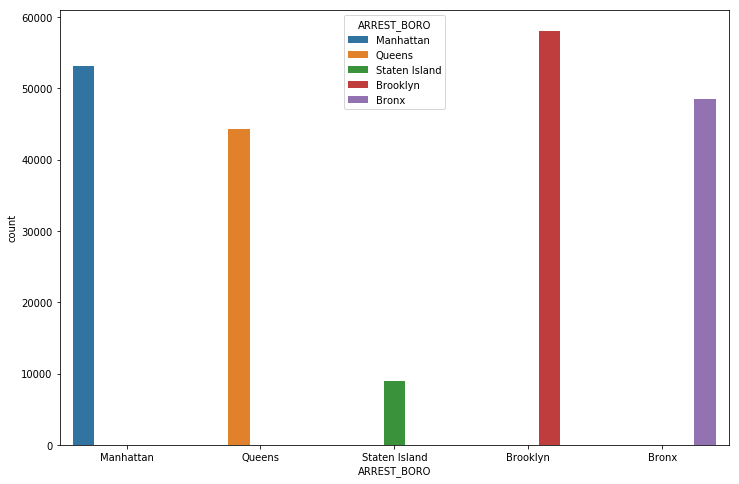

In [20]:
plt.figure(figsize = (12,8))
sns.countplot(nypd.ARREST_BORO, hue = nypd['ARREST_BORO'])
plt.show()

<font color = 'purple'> Brooklyn had 58,077 Offences, the highest number of Offences for the year 2019 as shown above, followed by Manhattan with 53,172, then the Bronx, Queens and Staten island, with 48,516, 44,329 and 8,995 respectively. Below is the graphical representation <font/>

In [25]:
#Looking at offenses by borough
nypd.groupby('ARREST_BORO')['OFNS_DESC'].value_counts().sort_values(ascending = False)[:20] #Show 20 

ARREST_BORO  OFNS_DESC                   
Bronx        ASSAULT 3 & RELATED OFFENSES    9176
Manhattan    PETIT LARCENY                   8470
Brooklyn     ASSAULT 3 & RELATED OFFENSES    8129
Queens       ASSAULT 3 & RELATED OFFENSES    7169
Bronx        DANGEROUS DRUGS                 6458
Manhattan    ASSAULT 3 & RELATED OFFENSES    6314
Brooklyn     DANGEROUS DRUGS                 5402
Manhattan    DANGEROUS DRUGS                 5302
Brooklyn     PETIT LARCENY                   4914
             MISCELLANEOUS PENAL LAW         4567
Manhattan    GRAND LARCENY                   4437
Brooklyn     FELONY ASSAULT                  4424
Bronx        FELONY ASSAULT                  4024
Queens       PETIT LARCENY                   3756
             VEHICLE AND TRAFFIC LAWS        3679
Bronx        PETIT LARCENY                   3623
Queens       MISCELLANEOUS PENAL LAW         3484
Brooklyn     VEHICLE AND TRAFFIC LAWS        3381
Queens       FELONY ASSAULT                  3363
Manhatta

Assault 3 & related Offenses topped the chart for most frequently occuring Offenses in 2019, with the Bronx in the lead, followed by Brooklyn and Queens.

In [19]:
#Count the crimes by the different races
#nypd.PERP_RACE, Not sure what this data is telling us.

In [78]:
#Count the crimes by the different genders
#nypd.PERP_SEX.value_counts()
counts = nypd.PERP_SEX.value_counts()
percent = nypd.PERP_SEX.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})

,counts,percent
M,173964,81.64%
F,39125,18.36%


Males are four times more likely to be arrested than females.

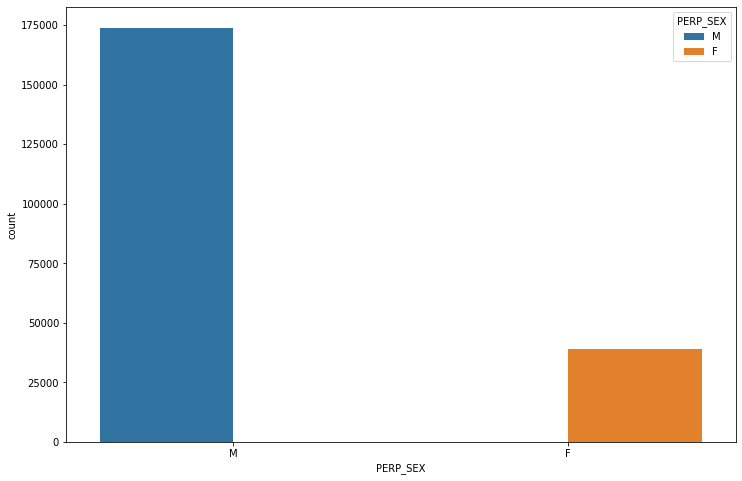

In [21]:
plt.figure(figsize = (12,8))
sns.countplot(nypd.PERP_SEX, hue = nypd['PERP_SEX'])
plt.show()

<font color = 'Purple' >The visualization above shows that there is a great disparity between Males being Arrested in 2019 and Females.Approximately 82% of males <font/>

In [22]:
counts = nypd.PERP_RACE.value_counts()
percent = nypd.PERP_RACE.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})

,counts,percent
BLACK,101979,47.86%
WHITE HISPANIC,53265,25.0%
WHITE,25284,11.87%
BLACK HISPANIC,18550,8.71%
ASIAN / PACIFIC ISLANDER,12013,5.64%
UNKNOWN,1401,0.66%
AMERICAN INDIAN/ALASKAN NATIVE,597,0.28%


In [23]:
#What is the relationship between level_of_offense (felony, misdemeanor) and race?

# nypd.LAW_CAT_CD
#.PERP_RACE.value_counts()

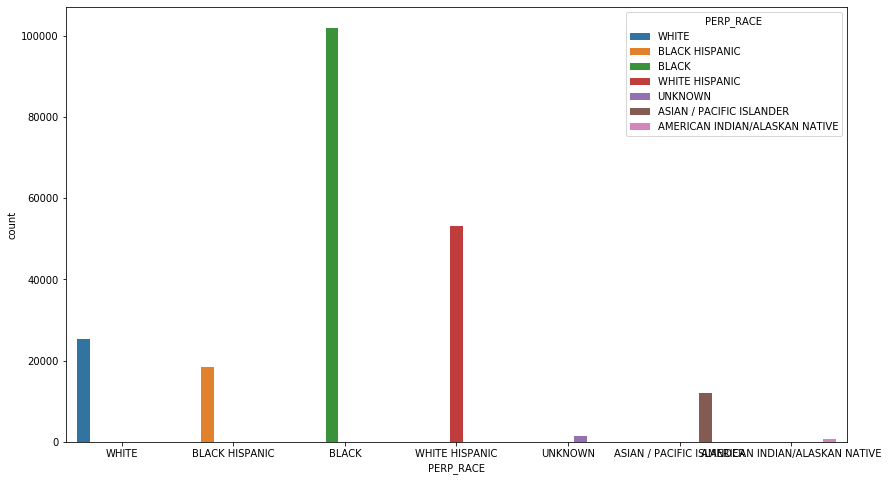

In [24]:
plt.figure(figsize = (14,8))
sns.countplot(nypd.PERP_RACE, hue = nypd['PERP_RACE'])
plt.show()

<font color = 'purple'>According to the data, There were approximately 48% Arrest of blacks in New York City for the year 2019, followed by white Hispanics with 25%.<font/>

In [25]:
nypd.AGE_GROUP.unique()

array(['25-44', '18-24', '45-64', '<18', '65+'], dtype=object)

In [26]:
nypd.AGE_GROUP.value_counts()

25-44    113292
18-24     43275
45-64     43249
<18       10260
65+        3013
Name: AGE_GROUP, dtype: int64

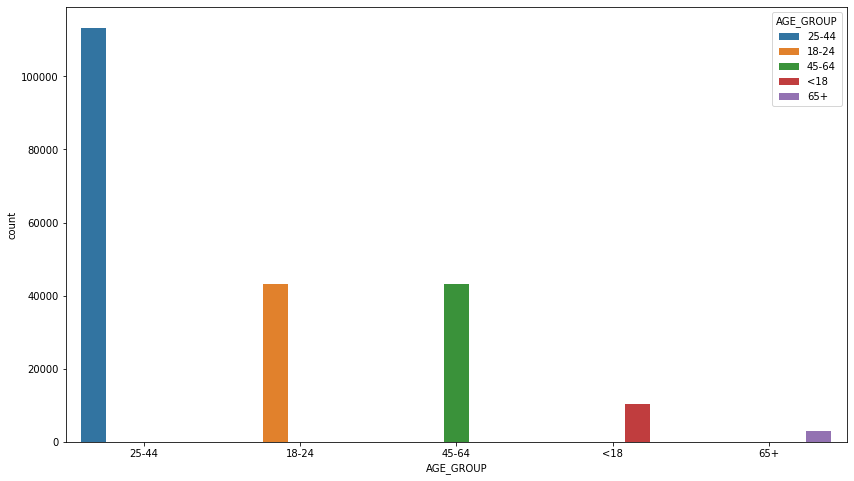

In [27]:
plt.figure(figsize = (14,8))
sns.countplot(nypd.AGE_GROUP, hue = nypd['AGE_GROUP'])
plt.show()

In [28]:
nypd.groupby('AGE_GROUP').PERP_RACE.value_counts().sort_values(ascending = False)

AGE_GROUP  PERP_RACE                     
25-44      BLACK                             51943
           WHITE HISPANIC                    29767
18-24      BLACK                             21972
45-64      BLACK                             20685
25-44      WHITE                             14187
18-24      WHITE HISPANIC                    10700
45-64      WHITE HISPANIC                    10022
25-44      BLACK HISPANIC                     9982
45-64      WHITE                              6651
25-44      ASIAN / PACIFIC ISLANDER           6292
<18        BLACK                              6241
18-24      BLACK HISPANIC                     4548
           WHITE                              3230
45-64      BLACK HISPANIC                     2853
           ASIAN / PACIFIC ISLANDER           2657
18-24      ASIAN / PACIFIC ISLANDER           2397
<18        WHITE HISPANIC                     2156
65+        BLACK                              1138
<18        BLACK HISPANIC               

<font color ='purple'>The majority of arrests were between those ages 25-44 years for the year 2019. Blacks made up the  majority with 51,943 instances.<font/>   

In [29]:
KBlack= nypd[(nypd['ARREST_BORO'] == 'Brooklyn') & (nypd['PERP_RACE'] == 'BLACK')].count()
KBlack

ARREST_KEY           34128
ARREST_DATE          34128
PD_CD                34128
PD_DESC              34128
KY_CD                34128
OFNS_DESC            34128
LAW_CODE             34128
LAW_CAT_CD           34128
ARREST_BORO          34128
ARREST_PRECINCT      34128
JURISDICTION_CODE    34128
AGE_GROUP            34128
PERP_SEX             34128
PERP_RACE            34128
X_COORD_CD           34128
Y_COORD_CD           34128
Latitude             34128
Longitude            34128
dtype: int64

<font color = 'purple'> Of the 58,077 Arrests in Brooklyn in 2019, 34,128 were Blacks. This is about 58% . The question is why? Why are blacks being disportionately Arrested in every category? </font>

In [30]:
nypd.groupby('ARREST_PRECINCT')['ARREST_BORO'].value_counts().sort_values(ascending = False)

ARREST_PRECINCT  ARREST_BORO
40               Bronx          7077
44               Bronx          6431
14               Manhattan      6024
75               Brooklyn       6010
113              Queens         5993
                                ... 
111              Queens          934
22               Manhattan        88
114              Manhattan        29
106              Brooklyn          1
10               Bronx             1
Name: ARREST_BORO, Length: 80, dtype: int64

<font color = 'purple' > Arrest Precint number 40, 44, 14, 75, 113 ranked highest in Arrests, with precinct # 40 in the Bronx arresting the highest number of persons for the year 2019.</font>

In [31]:
nypd.groupby('ARREST_BORO')['OFNS_DESC'].value_counts().sort_values(ascending = False)

ARREST_BORO    OFNS_DESC                       
Bronx          ASSAULT 3 & RELATED OFFENSES        9176
Manhattan      PETIT LARCENY                       8470
Brooklyn       ASSAULT 3 & RELATED OFFENSES        8129
Queens         ASSAULT 3 & RELATED OFFENSES        7169
Bronx          DANGEROUS DRUGS                     6458
                                                   ... 
Queens         DISRUPTION OF A RELIGIOUS SERV         1
Manhattan      UNLAWFUL POSS. WEAP. ON SCHOOL         1
               DISRUPTION OF A RELIGIOUS SERV         1
Staten Island  KIDNAPPING                             1
               OTHER STATE LAWS (NON PENAL LAW)       1
Name: OFNS_DESC, Length: 285, dtype: int64

In [32]:
Offence_level= {'F': 'Felony', 'M': 'Misdemeanor','V':'Violation'}
nypd['LAW_CAT_CD'] = nypd['LAW_CAT_CD'].replace(Offence_level)

In [33]:
counts = nypd.LAW_CAT_CD.value_counts()
percent = nypd.LAW_CAT_CD.value_counts(normalize = True).mul(100).round(2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent})

,counts,percent
Misdemeanor,126590,59.41%
Felony,83244,39.07%
Violation,2822,1.32%
I,433,0.2%


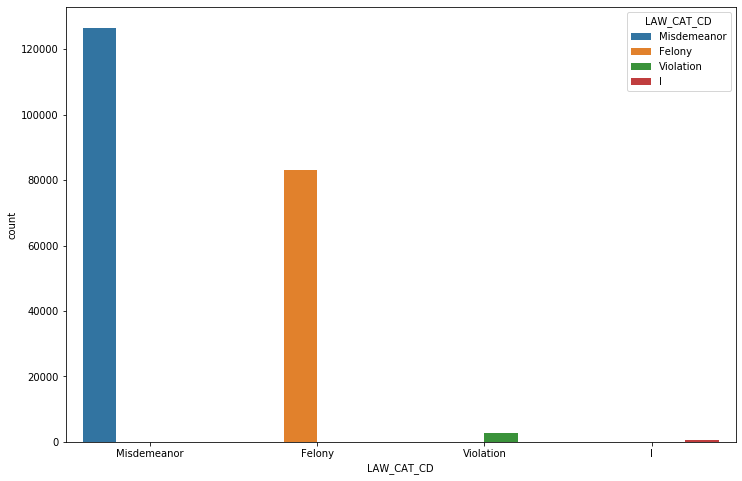

In [34]:
plt.figure(figsize = (12,8))
sns.countplot(nypd.LAW_CAT_CD, hue = nypd['LAW_CAT_CD'])
plt.show()

<font color = 'purple'>Overall in 2019 there were less Violent Crime(Felony), and more minor wrong doing(Misdemeanor) as shown above with 59.41% .<font/>

In [35]:
nypd.groupby('LAW_CAT_CD')['PERP_RACE'].value_counts().sort_values(ascending = False)

LAW_CAT_CD   PERP_RACE                     
Misdemeanor  BLACK                             57446
Felony       BLACK                             43173
Misdemeanor  WHITE HISPANIC                    32966
Felony       WHITE HISPANIC                    19542
Misdemeanor  WHITE                             16258
             BLACK HISPANIC                    11028
Felony       WHITE                              8208
Misdemeanor  ASIAN / PACIFIC ISLANDER           7564
Felony       BLACK HISPANIC                     7333
             ASIAN / PACIFIC ISLANDER           4353
Violation    BLACK                              1203
Misdemeanor  UNKNOWN                             907
Violation    WHITE                               754
             WHITE HISPANIC                      617
Felony       UNKNOWN                             466
Misdemeanor  AMERICAN INDIAN/ALASKAN NATIVE      421
Felony       AMERICAN INDIAN/ALASKAN NATIVE      169
Violation    BLACK HISPANIC                      158
I 

<font color = 'purple'> Blacks were arrested with the most Misdemeanor charges(minor wrong doing), than any other group in 2019. They were also rated highest for more serious crimes(felony).<font/>

In [36]:
nypd.groupby('LAW_CAT_CD')['ARREST_BORO'].value_counts().sort_values(ascending = False)

LAW_CAT_CD   ARREST_BORO  
Misdemeanor  Manhattan        33066
             Bronx            30705
             Brooklyn         30613
             Queens           26790
Felony       Brooklyn         26092
             Manhattan        18979
             Bronx            17560
             Queens           17068
Misdemeanor  Staten Island     5416
Felony       Staten Island     3545
Violation    Brooklyn          1152
             Manhattan         1065
             Queens             359
             Bronx              223
I            Brooklyn           220
             Queens             112
             Manhattan           62
             Bronx               28
Violation    Staten Island       23
I            Staten Island       11
Name: ARREST_BORO, dtype: int64

<font color = 'purple'> Brooklyn had the most violent crimes (Felony) with 26,092 occurrences in 2019, out of a total of 83,244 as shown above.</font>

In [44]:
nypd.groupby('ARREST_DATE').ARREST_DATE.count().sort_values(ascending = False)

ARREST_DATE
2019-05-02    877
2019-04-17    868
2019-01-10    846
2019-01-23    834
2019-07-24    832
             ... 
2019-12-29    292
2019-12-31    259
2019-11-28    242
2019-12-24    234
2019-12-25    178
Name: ARREST_DATE, Length: 365, dtype: int64

<font color = 'purple'> The results above suggests that on May, 2nd 2019 there were 877 arrests,  the highest number for the year, followed by 868 on April 17th. Data is showing that there were more arrests/crimes committed during the first quarter of the year/Winter-spring seasons.<font/>



In [48]:
nypd.groupby('LAW_CAT_CD')['ARREST_DATE'].value_counts().sort_values(ascending = False)


LAW_CAT_CD   ARREST_DATE
Misdemeanor  2019-01-23     497
             2019-05-02     495
             2019-01-10     493
             2019-04-10     488
             2019-01-03     479
                           ... 
I            2019-05-05       1
             2019-05-06       1
             2019-05-09       1
             2019-05-12       1
Violation    2019-12-31       1
Name: ARREST_DATE, Length: 1344, dtype: int64

<font color = 'purple' >There were more misdemeanors in the first quarter of 2019. None serious Arrests. <font>

In [51]:
nypd.groupby('ARREST_BORO')['ARREST_DATE'].value_counts().sort_values(ascending = False)

ARREST_BORO    ARREST_DATE
Brooklyn       2019-03-11     306
               2019-08-14     271
               2019-01-23     263
Manhattan      2019-04-24     262
               2019-10-10     257
                             ... 
Staten Island  2019-12-24       9
               2019-12-26       8
               2019-07-27       8
               2019-12-01       7
               2019-02-20       5
Name: ARREST_DATE, Length: 1825, dtype: int64

Most of those Arrest were in the Brooklyn Boro.

In [77]:
nypd.groupby('PERP_RACE')['ARREST_DATE'].value_counts().sort_values(ascending = False)

PERP_RACE                       ARREST_DATE
BLACK                           2019-07-24     446
                                2019-04-03     442
                                2019-08-14     425
                                2019-01-23     422
                                2019-04-30     408
                                              ... 
AMERICAN INDIAN/ALASKAN NATIVE  2019-09-16       1
                                2019-09-21       1
                                2019-09-23       1
                                2019-09-24       1
                                2019-11-18       1
Name: ARREST_DATE, Length: 2443, dtype: int64

<font color = 'purple'>Data is showing that more blacks were arrested during the spring and summer periods.<font/>